Sicher dass alle Daten gespiechert werden sollen(j/n): n
Nstart:1
[2]
Max Bin: 6.0
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5]
{'N': 10, 'tau': 10000, 'Nexp': 1, 't': 3000.0, 'W': 0.3, 'p': 0.3, 'v': 3.0, 'chi_sq': 3.379534707565956, 'pvalue': 0.6416886835121488}


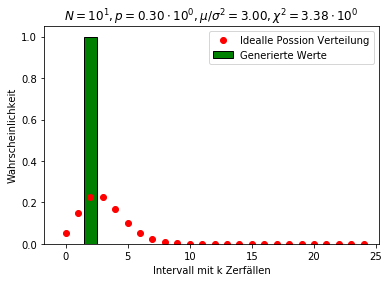

[2 2 7 2 0 0 5 7 2 3]
Max Bin: 7.0
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]
{'N': 100, 'tau': 10000, 'Nexp': 2, 't': 300.0, 'W': 0.3, 'p': 0.03, 'v': 3.0, 'chi_sq': 1.5624231272173428, 'pvalue': 0.955240699674941}


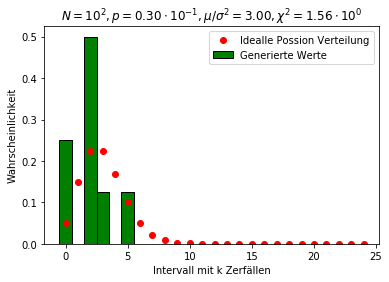

[0 3 2 3 4 2 5 1 0 5 2 2 5 1 2 2 0 0 6 1 5 1 1 3 1 6 2 0 5 4 4 2 6 2 2 4 1
 1 3 2 2 1 3 2 4 3 5 0 3 2 3 5 6 1 1 3 3 2 6 2 4 1 1 3 2 6 0 3 4 3 5 1 1 6
 3 3 4 3 3 3 2 2 3 3 2 5 5 5 2 4 2 9 6 0 1 3 3 8 3 2]
Max Bin: 9.0
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]
{'N': 1000, 'tau': 10000, 'Nexp': 3, 't': 30.0, 'W': 0.3, 'p': 0.003, 'v': 3.0, 'chi_sq': 0.09782305171161985, 'pvalue': 0.9999997706736857}


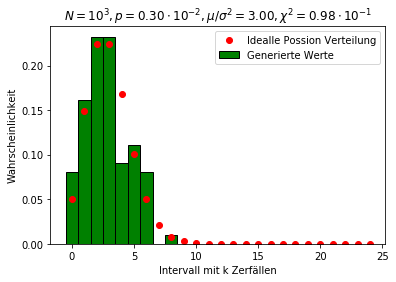

[4 2 4 5 2 5 3 5 2 2 1 3 1 3 3 2 1 2 0 7 1 5 4 2 6 1 5 5 2 3 1 4 2 3 4 0 4
 5 1 7 0 7 7 4 4 2 5 7 6 3 3 4 3 1 5 4 1 1 3 2 2 2 3 4 1 5 4 4 4 3 4 2 2 0
 3 5 1 3 3 2 4 3 2 2 3 3 1 4 2 3 3 5 6 2 2 3 2 2 2 1 5 3 2 6 4 1 4 5 2 1 3
 1 3 1 1 2 2 8 4 2 2 4 9 3 2 1 1 6 2 6 1 2 3 3 1 2 4 4 3 1 3 6 3 1 3 4 4 3
 2 6 6 1 7 4 2 1 2 5 4 5 4 2 1 2 3 2 3 2 4 0 6 4 2 3 3 0 7 1 3 6 3 3 4 3 2
 1 5 4 0 4 4 2 3 1 3 1 5 3 3 3 3 2 3 1 2 5 2 3 1 1 2 2 6 4 1 5 2 5 4 2 3 3
 4 5 1 5 5 2 3 1 1 1 2 2 2 2 2 4 2 3 3 3 7 3 2 1 3 1 3 2 3 0 0 0 6 1 2 3 4
 4 4 5 2 3 2 1 3 2 1 4 3 5 1 3 3 5 2 4 2 0 4 6 2 1 2 2 0 1 6 2 2 1 4 7 6 4
 4 4 3 3 5 2 4 4 3 3 1 3 2 2 4 3 5 2 2 1 2 2 1 6 1 2 4 1 3 3 6 2 3 0 2 3 1
 2 2 3 3 4 5 0 1 6 5 4 3 3 4 5 4 1 0 2 7 4 0 3 2 0 0 2 4 5 5 0 4 2 5 2 4 3
 2 5 4 1 3 2 3 4 2 6 0 3 2 8 5 4 3 3 2 3 1 6 3 5 2 2 1 8 2 0 3 5 2 1 5 1 2
 9 4 3 2 2 1 1 4 3 1 5 5 2 2 2 4 5 0 3 4 1 2 1 3 1 1 2 4 1 5 2 1 4 2 2 0 1
 4 3 3 3 5 3 3 4 5 3 2 3 7 4 5 1 2 7 1 5 5 3 1 2 3 2 5 3 2 4 1 0 3 0 4 2 2
 0 2 0 2 0 1 1 4 4 3 1 1 

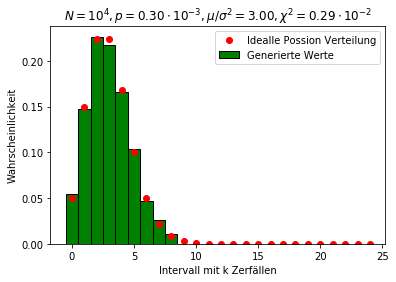

[3 2 4 ... 2 4 6]
Max Bin: 12.0
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5]
{'N': 100000, 'tau': 10000, 'Nexp': 5, 't': 0.3, 'W': 0.3, 'p': 2.9999999999999997e-05, 'v': 2.9999999999999996, 'chi_sq': 0.0007953290655408262, 'pvalue': 1.0}


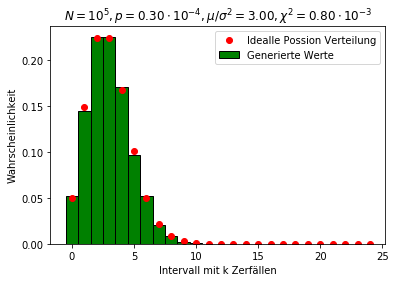

[3 5 6 ... 6 5 4]
Max Bin: 13.0
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]
{'N': 1000000, 'tau': 10000, 'Nexp': 6, 't': 0.03, 'W': 0.3, 'p': 3e-06, 'v': 3.0, 'chi_sq': 6.961818554747221e-05, 'pvalue': 1.0}


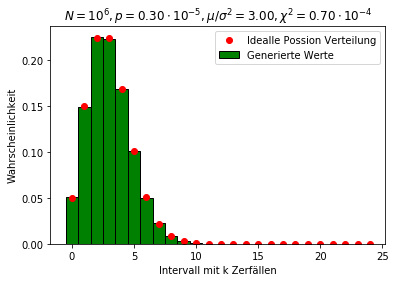

[1 1 3 ... 2 1 3]
Max Bin: 14.0
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5]
{'N': 10000000, 'tau': 10000, 'Nexp': 7, 't': 0.003, 'W': 0.3, 'p': 3e-07, 'v': 3.0, 'chi_sq': 8.121340561432595e-06, 'pvalue': 1.0}


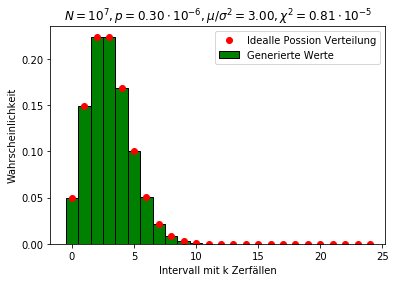

Runtime:15.39547610282898


In [1]:
%matplotlib inline 
import numpy as np #speichern der Ergebnisse und Array manipulation
import matplotlib.pyplot as plt #zeichnen der Ergebnisse
import time #messen der Runtime
import math #berechnen des Startwertes von N
import scipy  #berechnung von Chi^2
from scipy.stats import poisson #erstellen einer Possion verteilung
import gen_data_mp #selbstgeschribes Programm zum generiren des Datensatz mit Hilfe von Multiprocessing
import os #erstellen von Ordnern
from datetime import datetime #aktuelle Zeit für Ordnernamen abfragen

def split(value):
    """Gibt die gerundete Mantisse und den Exponenten in der 10er Basis wieder für Postitive werte
    
    Parameter
        value(float)
    Wiedergabe
        exp(int):
    """
    try:
        exp=int(math.log10(value))
        man=value/10**exp
        return exp,man
    except:
        print("Error mit "+str(value))

def draw_hist(array,values,speichern=False,filename=None,debug=False):
    """Zeichnet ein Histogramm mit gegeben Werten und vergleicht dieses mit einer Possion Verteilung
    
    Parameter
        array (numpy array):Ein Array in welchem die Zerfälle je Intervall eingetragen sind
        values (dict):Beinhaltet verschiedene Werte bezüglich des jeweiligen Histogramms
        debug (boolean,opt):Aktiviert zuzätzliche prints
        speichern (boolean,opt):Speichet den Plot in einem spezifiziertem Pfad  
        filename (str,opt):Gibt Pfad & Namen des Plots an
    """    
    
    #beste binrange bestimmen
    maxofz = np.amax(array) #Groesster Wert an Zerfaellen in einem Intervall
    maxofzv = np.amax([maxofz,(values["v"])*2]) #Groesster Wert an Zerfaellen in einem Intervall oder varianz*2
    if(debug):
        print(f"Max Bin: {maxofzv}")
    #bennen der Achsen
    plt.ylabel('Wahrscheinlichkeit')
    plt.xlabel('Intervall mit k Zerfällen')
    
    #idealle Possion Verteilung erzeugen:
    x = np.arange(poisson.ppf(10**(-15), values["v"]),poisson.ppf(1-10**(-15), values["v"]))    
    y = poisson.pmf(x, values["v"])
    plt.plot(x,y,"ob",color="red",label='Idealle Possion Verteilung') 
    
    #erstellen der Bins & generiren des Histogramm
    bins=np.arange(-0.5,maxofzv,1) 
    if(debug):
        print(bins)
    n_hist, bins_hist, patches_hist = plt.hist(array,edgecolor="black",density=True,color="green",bins=bins,label='Generierte Werte')
    
    #Anpassen der größe des Intervalles der idealen Possionverteilung zum berechen von Chi^2    
    y=y[0:n_hist.size]
    
    #Berechnen von Chi^2 und dem p-value
    values["chi_sq"],values["pvalue"]=scipy.stats.chisquare(f_obs=n_hist,f_exp=y)
    if(debug):
        print(values)
    
    #Erstellen eines Titel für den Plot
    t_Nexp="{}".format(values["Nexp"])
    t_p_exp,t_p_man=split(values["p"])
    t_p_man = "{:.2f}".format(t_p_man)
    t_v="{0:.2f}".format(values["v"])
    
    #falls keine Zerfälle im Intervall stattgefunden haben
    if not (np.isnan(values["chi_sq"])) and values["chi_sq"]!=0:
        t_chi_exp,t_chi_man=split(values["chi_sq"])
        t_chi_man = "{:.2f}".format(t_chi_man)
    else:
        t_chi_exp,t_chi_man="","-"
    
    plt.title(r"$N=10^{{{0}}},p={{{1}}}\cdot10^{{{2}}},\mu/\sigma^2={{{3}}},\chi^2={{{4}}}\cdot10^{{{5}}}$".format(t_Nexp,t_p_man,t_p_exp,t_v,t_chi_man,t_chi_exp))    
    
    if(speichern):
        #Speichern der spezifischen Werte
        valarr = np.zeros(len(values))
        i=0
        for key, value in values.items():
            valarr[i]=value
            i+=1
        np.savetxt(f"{filename},values.csv",valarr,delimiter=',')
        #Speichern des Plot
        plt.savefig(f"{filename}.png")
    
    plt.legend()
    
    #Zeichen des Plot
    plt.show()


def gen_hist(tau,T,N,Nint,debug=False,speichern=False,path=None): #generiert Daten und zeichnet sie
    """Erstellt ein einzeles Histogramm mit speziellen Werten
    
    Parameter
        tau (int):Die Lebenszeit eines Teilchens
        T (int):Beobachtungsintervall
        N (int):Anzahl der Kerne
        Nint (int): Anzahl der Unterintervalle
        debug (boolean,opt):Aktiviert zuzätzliche prints
        speichern (boolean,opt):Speichet die Daten&Plots in /Daten/"Aktuelles Datum"  
        path(str):gibt den Pfad an wo alle daten abgespeichert werden
        
    """
    if __name__ == '__main__':
        
        #liest die anzahl der verfügbaren logischen Kerne aus
        proc=os.cpu_count()
        
        filename=None
        
        #generiren der Daten:
        array,values =gen_data_mp.main(tau,T,N,Nint,proc=proc)
        
        #Mögliches abspeichern der Daten
        if(speichern):
            
            #generiren eines einzigartigen Ordnern zum speichern aller Daten falls zuvor kein path erstellt wurde
            if(path==None):
                folder=str("daten"+"\\"+datetime.today().strftime('%Y-%m-%d-%H-%M-%S'))
                os.makedirs(name=folder)
                path = os.path.abspath(folder)

            #generiren des Dateinenamen+Pfad
            N=values["N"];Nexp=values["Nexp"];t=values["t"];W=values["W"];p=values["p"];v=values["v"]
            filename=f"{path}\\N_{N}_Nexp_{Nexp}_t_{t}_W_{W}_p_{p}_v_{v}"
            filename=filename.replace(".",",")   
            if(debug):
                print(filename)
            #Speichern der Daten
            np.savetxt(f"{filename}.csv",array,delimiter=',')

        if(debug):
            print(array)
        #zeichen des Histogramms
        draw_hist(array,values,speichern=speichern,filename=filename,debug=debug)
        
    
def gen_hist_lam(tau,T,Nend,lam,debug=False,speichern=False):
    """Erstellen mehrere Histogramme nach Aufgabe 3 wobei N bis 10^Nend läuft
    
    Parameter 
        tau (int):Die Lebenszeit eines Teilchens
        T (int):Beobachtungsintervall
        Nend (int):Letztes N(10**Nend) welches Berechent wird
        lam (int):Konstate welche eine Zehnerpotenz seien muss und das Verhältnis von N zu den Unterintervallen spezifiziert
        debug (boolean,opt):Aktiviert zuzätzliche prints
        speichern (boolean,opt):Speichet die Daten&Plots in /Daten/"Aktuelles Datum"  
    """
    
    while(speichern):
        ant=(input("Sicher dass alle Daten gespiechert werden sollen(j/n): "))
        if(ant=="j"):
            break
        elif(ant=="n"):
            speichern=False
        else:
            print("Bitte giben sie j für Ja und n für Nein an")
           
    #Berechnet Startwert der Ns da dieser Größer Seien müssen als Lambda
    Nstart = int(math.log10(lam)) 
    
    #Überprüft ob Lambda eine Zehnerpotenz ist:
    if(lam/10**Nstart!=1): 
        sys.stderr.write("Lambda muss eine Zehnerpotenz sein")
        sys.exit() #Stoppt die Ausführung um eine Division durch Null zu verhindern
        
    if(debug):
        print(f"Nstart:{Nstart}")
    path=None
    
    if(speichern):
        folder=str("daten"+"\\"+datetime.today().strftime('%Y-%m-%d-%H-%M-%S'))
        os.makedirs(name=folder)
        path = os.path.abspath(folder)
        
    #erstellen aller Histogramme
    for x in range(Nend-Nstart+1):
        exp = Nstart+x
        N=int(10**exp)
        Nint=int(N/lam)
        gen_hist(tau,T,N,Nint,debug=debug,speichern=speichern,path=path)

        
if(False):#generiert ein spezielles Histogramm
    start=time.time()

    gen_hist(tau = 100000000 #Lebenszeit
             ,T = 3000#Beobachtungsintervall
             ,N = int(10**6)#Anzahl der Intervalle
             ,Nint = int(int(10**8)/100000) #erintervalle
             ,debug=False #opt. Schaltet prints ein
             ,speichern=False)
    
    end = time.time()
    print(f"Runtime:{end-start}")
    
if(True):#generiert Histogramme mit N->Infinity
    start=time.time()
    
    gen_hist_lam(tau = 10000 #Lebenszeit 
        ,T = 3000 #Beobachtungsintervall
        ,Nend = 7 #Ende der Ns #Schritte der Ns
        ,lam = 10 #Festgehaltenes Lambda, Muss eine Zehnerpotenz sein
        ,debug=True #opt. Schaltet prints ein
        ,speichern=True)#opt. speichern der Daten
    end = time.time()
    
    print(f"Runtime:{end-start}") #Messen der runtime